In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('data/Life Expectancy Data.csv')

In [3]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
data[data["Country"] == "Viet Nam"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2875,Viet Nam,2014,Developing,75.9,128.0,28,4.09,0.0,95.0,15033,...,96.0,7.70,95.0,0.1,NaN,NaN,14.3,14.7,0.675,12.5
2876,Viet Nam,2013,Developing,75.7,129.0,28,4.00,0.0,59.0,1123,...,93.0,7.17,59.0,0.1,NaN,NaN,14.3,14.9,0.668,12.3
2877,Viet Nam,2012,Developing,75.6,13.0,29,4.12,0.0,97.0,578,...,97.0,6.96,97.0,0.1,NaN,NaN,14.4,15.0,0.662,12.2
2878,Viet Nam,2011,Developing,75.4,131.0,29,3.94,0.0,95.0,750,...,96.0,6.20,95.0,0.1,NaN,NaN,14.4,15.2,0.655,12.0
2879,Viet Nam,2010,Developing,75.2,133.0,29,3.93,0.0,88.0,2809,...,94.0,6.36,93.0,0.1,NaN,NaN,14.5,15.4,0.647,11.9
2880,Viet Nam,2009,Developing,75.0,134.0,29,3.86,0.0,94.0,6582,...,97.0,6.40,96.0,0.1,NaN,NaN,14.6,15.5,0.641,11.7
2881,Viet Nam,2008,Developing,74.9,135.0,28,3.58,0.0,87.0,352,...,93.0,5.53,93.0,0.2,NaN,NaN,14.7,15.7,0.633,11.6
2882,Viet Nam,2007,Developing,74.7,136.0,28,3.01,0.0,67.0,17,...,92.0,6.90,92.0,0.2,NaN,NaN,14.9,15.8,0.625,11.4
2883,Viet Nam,2006,Developing,74.6,136.0,28,2.56,0.0,93.0,1978,...,94.0,5.56,94.0,0.2,NaN,NaN,15.1,15.9,0.618,11.3


In [5]:
df = data.copy()

Rename columns

In [6]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)


In [7]:
df

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
df.isna().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

The percent of missing value

In [9]:
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage

Country                          0.000000
Year                             0.000000
Status                           0.000000
Lifeexpectancy                   0.340368
AdultMortality                   0.340368
infantdeaths                     0.000000
Alcohol                          6.603131
percentageexpenditure            0.000000
HepatitisB                      18.822328
Measles                          0.000000
BMI                              1.157250
under-fivedeaths                 0.000000
Polio                            0.646698
Totalexpenditure                 7.692308
Diphtheria                       0.646698
HIV/AIDS                         0.000000
GDP                             15.248468
Population                      22.191967
thinness1-19years                1.157250
thinness5-9years                 1.157250
Incomecompositionofresources     5.684139
Schooling                        5.547992
dtype: float64

Check the duplicated row

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
num_col=[]
cat_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col)  

['Country', 'Status']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


### Visualization data

<Axes: xlabel='Lifeexpectancy', ylabel='Count'>

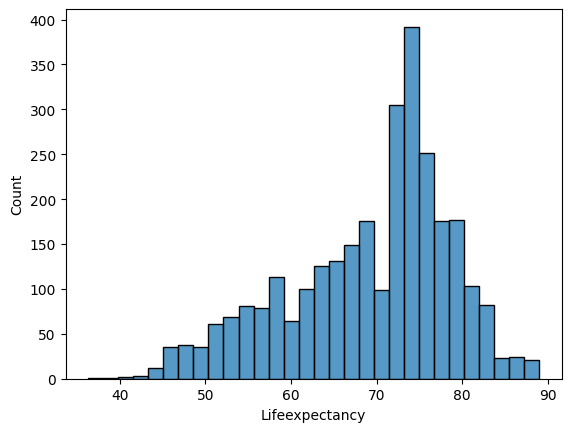

In [12]:
sns.histplot(data=df,x='Lifeexpectancy')

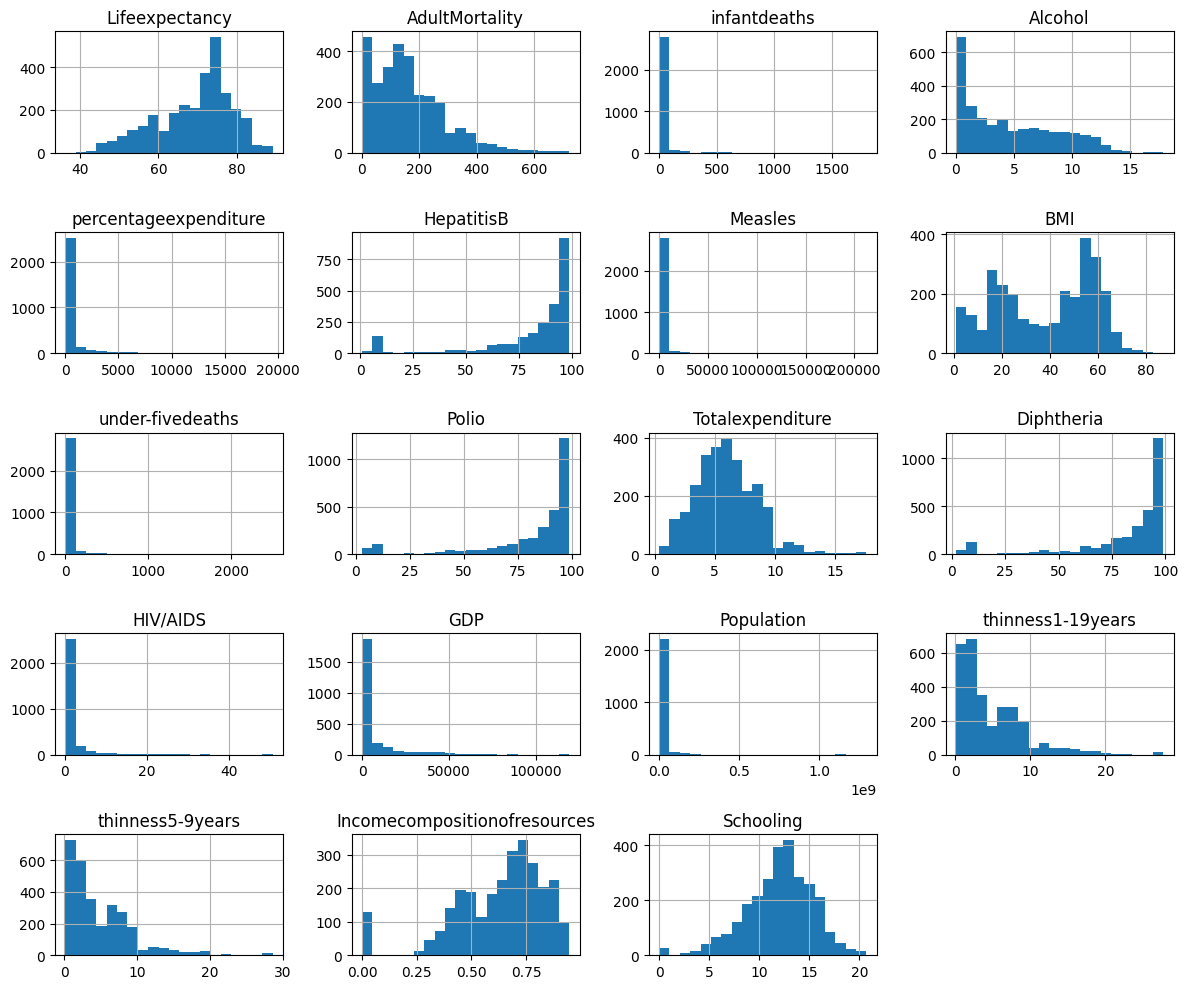

In [13]:
df[num_col].drop(columns='Year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

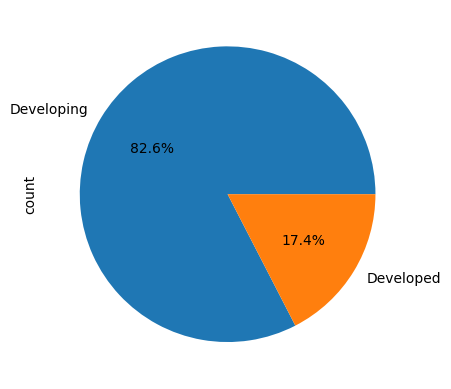

In [14]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

# Data preprocessing

Remove no need columns

In [15]:
df.drop(columns=['thinness5-9years','BMI','infantdeaths'],inplace=True)

Map country to Continent

In [16]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
def map_country2continent(cname:str):
  try:
    code = country_alpha2_to_continent_code(country_name_to_country_alpha2(cname))
    continent = convert_continent_code_to_continent_name(code)
    return continent
  except Exception as e:
    if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
        continent = 'Asia'
        return continent

In [17]:
df1 = df.copy()

In [18]:
df1['Continent'] = df1['Country'].apply(map_country2continent)
print(df1['Continent'].unique())
df1['Continent'] = LabelEncoder().fit_transform(df1['Continent'])
df1['Year'] = LabelEncoder().fit_transform(df1['Year'])
df1['Status'] = LabelEncoder().fit_transform(df1['Status'])
df1.drop(['Country'], axis=1, inplace=True)
print(df1['Continent'].unique())

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania' None]
[1 2 0 3 5 4 6]


In [19]:
df1

,Year,Status,Lifeexpectancy,AdultMortality,Alcohol,percentageexpenditure,HepatitisB,Measles,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,Incomecompositionofresources,Schooling,Continent
0,15,1,65.0,263.0,0.01,71.279624,65.0,1154,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,1
1,14,1,59.9,271.0,0.01,73.523582,62.0,492,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,1
2,13,1,59.9,268.0,0.01,73.219243,64.0,430,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,1
3,12,1,59.5,272.0,0.01,78.184215,67.0,2787,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,1
4,11,1,59.2,275.0,0.01,7.097109,68.0,3013,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4,1,44.3,723.0,4.36,0.000000,68.0,31,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,0
2934,3,1,44.5,715.0,4.06,0.000000,7.0,998,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,0
2935,2,1,44.8,73.0,4.43,0.000000,73.0,304,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,0
2936,1,1,45.3,686.0,1.72,0.000000,76.0,529,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,0


### Handling the Outliers

In [20]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Percentage    
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")   
    
#Checking Outliers 
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False

In [21]:
num_col=[]
cat_col=[]
for col in df1.columns:
    if df1[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col)  

[]
['Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'Incomecompositionofresources', 'Schooling', 'Continent']


In [22]:
for col in (df1[num_col].drop(columns='Year').columns):
    outlier_percentage(df1,col)

Status
Outliers percentage: 17.426820966643973 %
-------------------------
Lifeexpectancy
Outliers percentage: 0.3403675970047651 %
-------------------------
AdultMortality
Outliers percentage: 2.791014295439074 %
-------------------------
Alcohol
Outliers percentage: 0.0 %
-------------------------
percentageexpenditure
Outliers percentage: 13.240299523485364 %
-------------------------
HepatitisB
Outliers percentage: 8.645336963921036 %
-------------------------
Measles
Outliers percentage: 18.447923757658273 %
-------------------------
under-fivedeaths
Outliers percentage: 13.410483321987746 %
-------------------------
Polio
Outliers percentage: 9.496255956432947 %
-------------------------
Totalexpenditure
Outliers percentage: 1.0891763104152483 %
-------------------------
Diphtheria
Outliers percentage: 10.142954390742002 %
-------------------------
HIV/AIDS
Outliers percentage: 18.447923757658273 %
-------------------------
GDP
Outliers percentage: 12.423417290673928 %
----------

In [23]:
def replace_with_threshholds(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit

In [24]:
for column in (df1[num_col].drop(columns='Year').columns):
    replace_with_threshholds(df1, column)
    
    print(column,check_outliers(df1,column))


Status False
Lifeexpectancy False
AdultMortality False
Alcohol False
percentageexpenditure False
HepatitisB False
Measles False
under-fivedeaths False
Polio False
Totalexpenditure False
Diphtheria False
HIV/AIDS False
GDP False
Population False
thinness1-19years False
Incomecompositionofresources False
Schooling False
Continent False


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25580\3276887866.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-540.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25580\3276887866.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[column]<low_limit),column]=low_limit


In [25]:
X = df1.drop(['Lifeexpectancy'], axis=1)
y = df1['Lifeexpectancy']

In [26]:
num_attribs=df1[num_col].drop(columns=['Year','Lifeexpectancy','Continent','Status']).columns
cat_attribs=['Status','Continent', 'Year']

In [27]:
cat_attribs

['Status', 'Continent', 'Year']

- Filla Nan for X and y

In [28]:
num_pipeline=make_pipeline(SimpleImputer(strategy='median'))
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'))
preprocessing=ColumnTransformer([
     ('num',num_pipeline,num_attribs),
     ('cat',cat_pipeline,cat_attribs)
     ])

In [29]:
X_not_scale = pd.DataFrame(preprocessing.fit_transform(X)) 
X_scaled = StandardScaler().fit_transform(X_not_scale)

In [30]:
X_not_scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,263.0,0.01,71.279624,65.0,900.625,70.0,49.5,8.16,65.0,0.10,584.259210,1.825721e+07,15.6,0.479,10.1,1.0,1.0,15.0
1,271.0,0.01,73.523582,62.0,492.000,70.0,58.0,8.18,62.0,0.10,612.696514,3.275820e+05,15.6,0.476,10.0,1.0,1.0,14.0
2,268.0,0.01,73.219243,64.0,430.000,70.0,62.0,8.13,64.0,0.10,631.744976,1.825721e+07,15.6,0.470,9.9,1.0,1.0,13.0
3,272.0,0.01,78.184215,67.0,900.625,70.0,67.0,8.52,67.0,0.10,669.959000,3.696958e+06,15.6,0.463,9.8,1.0,1.0,12.0
4,275.0,0.01,7.097109,68.0,900.625,70.0,68.0,7.87,68.0,0.10,63.537231,2.978599e+06,15.6,0.454,9.5,1.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,459.0,4.36,0.000000,68.0,31.000,42.0,67.0,7.13,65.0,1.85,454.366654,1.277751e+07,9.4,0.407,9.2,1.0,0.0,4.0
2934,459.0,4.06,0.000000,47.0,900.625,41.0,49.5,6.52,68.0,1.85,453.351155,1.263390e+07,9.8,0.418,9.5,1.0,0.0,3.0
2935,73.0,4.43,0.000000,73.0,304.000,40.0,73.0,6.53,71.0,1.85,57.348340,1.255250e+05,1.2,0.427,10.0,1.0,0.0,2.0
2936,459.0,1.72,0.000000,76.0,529.000,39.0,76.0,6.16,75.0,1.85,548.587312,1.236616e+07,1.6,0.427,9.8,1.0,0.0,1.0


In [31]:
X_not_scale.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [32]:
y.fillna(y.median(), inplace=True)

# Linear Regression Model

In [33]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_not_scale, y, test_size=0.2, random_state=42)

In [34]:
X_train_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
456,126.0,5.28,345.463714,96.0,0.000,0.0,98.0,4.30,98.0,0.60,3112.285712,486438.0,8.1,0.602,11.9,1.0,0.0,7.0
462,152.0,3.81,150.743486,92.0,0.000,0.0,91.0,5.19,49.5,0.80,1268.884564,443716.0,9.4,0.562,11.0,1.0,0.0,1.0
2172,143.0,10.43,0.000000,99.0,0.000,0.0,99.0,7.58,99.0,0.10,1766.947595,1386542.0,4.3,0.733,12.9,1.0,3.0,11.0
2667,13.0,1.29,594.645310,98.0,16.000,3.0,98.0,7.26,98.0,0.10,4199.472530,1114558.0,6.4,0.720,14.7,1.0,0.0,13.0
381,95.0,0.13,941.703687,99.0,0.000,0.0,99.0,3.40,94.0,0.10,14081.112399,1386542.0,6.7,0.820,13.3,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,59.0,6.91,1096.807347,82.0,3.000,0.0,96.0,9.60,96.0,0.10,14081.112399,416268.0,0.8,0.826,14.8,1.0,2.0,11.0
1095,287.0,3.21,53.307827,83.0,26.000,7.0,82.0,6.70,83.0,1.85,543.957418,155588.0,8.0,0.405,8.9,1.0,0.0,10.0
1130,266.0,6.08,56.778587,92.0,0.000,23.0,62.0,5.56,63.0,1.85,615.819819,9556889.0,4.2,0.458,8.4,1.0,3.0,7.0
1294,72.0,9.30,1096.807347,95.0,900.625,3.0,97.0,8.17,96.0,0.10,14081.112399,5731323.0,0.5,0.841,15.4,1.0,2.0,3.0


In [35]:
model_not_scale = LinearRegression()

In [36]:
model_not_scale.fit(X_train_1, y_train_1)

LinearRegression()

In [37]:
y_pred_1 = model_not_scale.predict(X_test_1)

In [38]:
print(max(y_pred_1), min(y_test_1))

83.0387221252173 44.2


# 1.1 Tính toán các sai số MAE, MSE, R^2 trước khi chuẩn hóa

In [39]:
mae_1 = mean_absolute_error(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
r2_1 = r2_score(y_test_1, y_pred_1)
print(f"MAE: {mae_1}, MSE: {mse_1}, R^2: {r2_1}")

MAE: 2.6545810140403727, MSE: 12.355370415513605, R^2: 0.8573552295710789


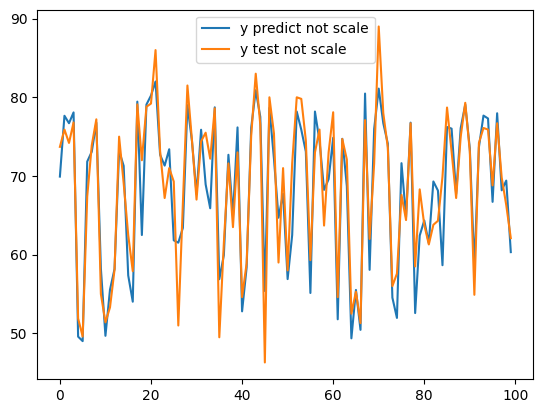

In [40]:
plt.plot([i for i in range(100)], list(y_pred_1)[:100], label='y predict not scale')
plt.plot([i for i in range(100)], list(y_test_1)[:100], label='y test not scale')
plt.legend()
plt.show()

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
X_train_2

array([[-0.31149593,  0.18696061,  0.15772883, ...,  0.        ,
        -1.03081462, -0.11244612],
       [-0.08668818, -0.18791715, -0.34233688, ...,  0.        ,
        -1.03081462, -1.41310244],
       [-0.16450625,  1.50030787, -0.72946486, ...,  0.        ,
         0.81210628,  0.75465809],
       ...,
       [ 0.89900731,  0.39097572, -0.5836504 , ...,  0.        ,
         0.81210628, -0.11244612],
       [-0.77840432,  1.21213653,  2.08727253, ...,  0.        ,
         0.19779932, -0.97955033],
       [-1.10696948, -0.8866689 , -0.71645811, ...,  0.        ,
        -1.03081462, -0.54599823]])

In [43]:
model_scaled = LinearRegression()

In [44]:
model_scaled.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
y_pred_2 = model_scaled.predict(X_test_2)

In [46]:
print(max(y_pred_2), min(y_test_2))

83.03872212526713 44.2


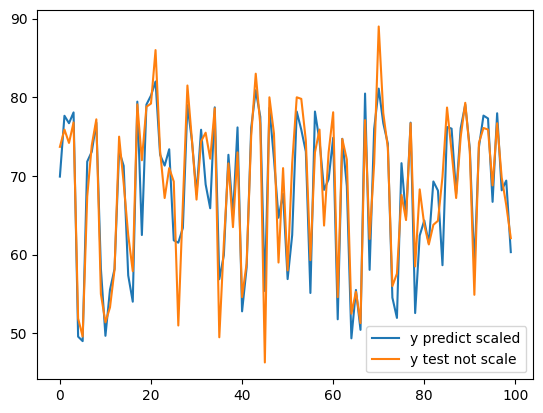

In [47]:
plt.plot([i for i in range(100)], list(y_pred_2)[:100], label='y predict scaled')
plt.plot([i for i in range(100)], list(y_test_2)[:100], label='y test not scale')
plt.legend()
plt.show()

# 1.2 Tính toán các sai số MAE, MSE, R^2 sau khi chuẩn hóa

In [48]:
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
r2_2 = r2_score(y_test_2, y_pred_2)
print(f"MAE: {mae_2}, MSE: {mse_2}, R^2: {r2_2}")

MAE: 2.654581014039808, MSE: 12.355370415505053, R^2: 0.8573552295711777


# 2. So sánh các giá trị sai số sau khi chuẩn hóa dữ liệu và trước khi chuẩn hóa dữ liệu


In [49]:
print("                 Before | After")
print(f"MAE: {mae_1} | {mae_2}")
print(f"MSE: {mse_1} | {mse_2}")
print(f"R^2: {r2_1} | {r2_2}")

                 Before | After
MAE: 2.6545810140403727 | 2.654581014039808
MSE: 12.355370415513605 | 12.355370415505053
R^2: 0.8573552295710789 | 0.8573552295711777


# 3. Sử dụng kỹ thuật cross validation để tối ưu hóa các chỉ số

In [50]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val=cross_val_score(LinearRegression(), X_scaled, y, scoring='r2',cv=cv)
cross_val

array([0.85735523, 0.85653317, 0.8462157 , 0.84479936, 0.84948389])

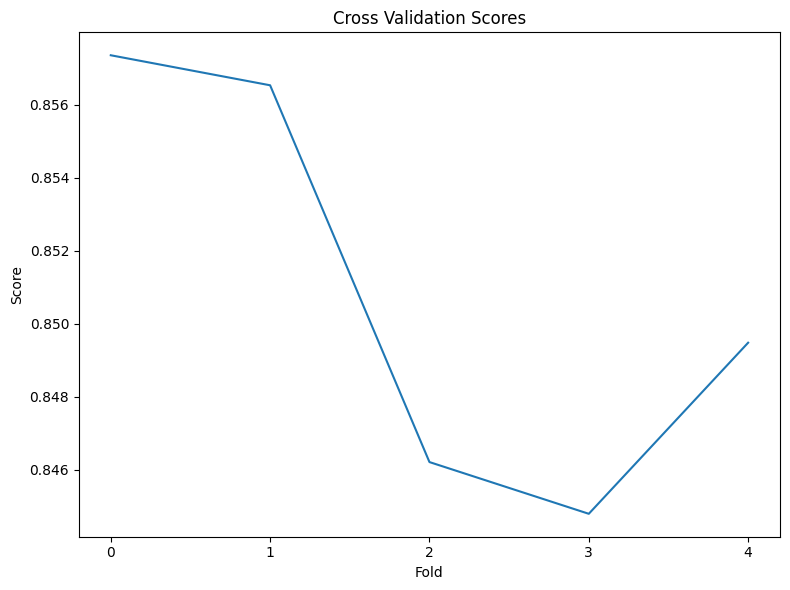

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val)
plt.title("Cross Validation Scores")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(np.arange(0,5))
plt.tight_layout()
plt.show()

In [52]:
print(f"Max {cross_val.max()} \nMean {cross_val.mean()} \nMin {cross_val.min()}")

Max 0.8573552295711777 
Mean 0.8508774684984053 
Min 0.844799358942542


# 4. Biểu diễn dữ liệu tuổi thọ của từng quốc gia tới năm 2030


In [53]:
df2 = df.copy()

In [54]:
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')
df2.fillna({'Lifeexpectancy': round(df2['Lifeexpectancy'].mean())}, inplace=True)
df2['Lifeexpectancy'] = pd.to_numeric(df2['Lifeexpectancy'], errors='coerce')

In [55]:
countries = df2['Country'].unique()

In [56]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter'}]])

# Tạo dữ liệu cho mỗi quốc gia
for i, country in enumerate(countries):
    country_data = df2[df2['Country'] == country]
    
    # Tạo mô hình linear regression
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Lifeexpectancy'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Dự đoán tuổi thọ cho các năm từ 2000 đến 2030
    years = np.arange(2000, 2031).reshape(-1, 1)
    predictions = model.predict(years)
    
    # Thêm dữ liệu vào biểu đồ
    fig.add_trace(
        go.Scatter(
            x=years.flatten(),
            y=predictions,
            mode='lines',
            name=country,
            visible=(i == 0)  # Chỉ hiển thị quốc gia đầu tiên ban đầu
        )
    )

# Cập nhật layout
fig.update_layout(
    title='Dự đoán tuổi thọ theo quốc gia (2000-2030)',
    xaxis_title='Năm',
    yaxis_title='Tuổi thọ',
    updatemenus=[{
        'buttons': [
            {
                'args': [{'visible': [i == j for j in range(len(countries))]}],
                'label': country,
                'method': 'update'
            } for i, country in enumerate(countries)
        ],
        'direction': 'down',
        'pad': {'r': 10, 't': 10},
        'showactive': True,
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.1,
        'yanchor': 'top'
    }],
    showlegend=False
)

# Hiển thị biểu đồ
fig.show()